## Purpose

To compute the ML performance of the proposed method in near real-time.

In [2]:
import json
from sklearn.metrics import roc_auc_score, average_precision_score
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np

## Load the Dataset

In [3]:
# file = "results_reverse_light_on_attack_3_masquerade_distribution_ROAD.json"
# file = "results_correlated_signal_attack_3_masquerade_distribution_ROAD.json"
file = "results_reverse_light_off_attack_2_masquerade_distribution_ROAD.json"

with open(f"/home/cloud/ceph-robust/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
    grid2performance = json.load(outfile)

In [4]:
grid2performance.keys()

dict_keys(['50-10', '50-20', '50-30', '50-40', '50-50', '100-10', '100-20', '100-30', '100-40', '100-50', '100-60', '100-70', '100-80', '100-90', '100-100', '150-10', '150-20', '150-30', '150-40', '150-50', '150-60', '150-70', '150-80', '150-90', '150-100', '150-110', '150-120', '150-130', '150-140', '150-150', '200-10', '200-20', '200-30', '200-40', '200-50', '200-60', '200-70', '200-80', '200-90', '200-100', '200-110', '200-120', '200-130', '200-140', '200-150', '200-160', '200-170', '200-180', '200-190', '200-200', '250-10', '250-20', '250-30', '250-40', '250-50', '250-60', '250-70', '250-80', '250-90', '250-100', '250-110', '250-120', '250-130', '250-140', '250-150', '250-160', '250-170', '250-180', '250-190', '250-200', '250-210', '250-220', '250-230', '250-240', '250-250', '300-10', '300-20', '300-30', '300-40', '300-50', '300-60', '300-70', '300-80', '300-90', '300-100', '300-110', '300-120', '300-130', '300-140', '300-150', '300-160', '300-170', '300-180', '300-190', '300-200',

In [5]:
key2ttw = defaultdict(list)
index = []

for key in grid2performance.keys():

    ttw = grid2performance[key]["ttw"]

    columns = key.split("-")

    # print(columns)
    key2ttw[columns[0]].append(ttw)
    # sample.append(dict(entry))

    if columns[1] not in index: 
        index.append(columns[1])

    # break

key2ttw = dict(key2ttw)
# print(key2ttw)
# print(len(index), index)

df_ttw = pd.DataFrame({k:pd.Series(v) for k, v in key2ttw.items()})
df_ttw.index = index

# Covert to miliseconds
df_ttw = 1000*df_ttw

In [6]:
display(df_ttw)
df_ttw = df_ttw[::-1] # invert the order of dataframe rows
display(df_ttw)

50       100       150       200       250       300       350  \
10   0.350609  0.336435  0.329851  0.335648  0.340491  0.337789  0.337157   
20   0.340413  0.337367  0.334493  0.351049  0.333439  0.338408  0.340877   
30   0.336065  0.354306  0.330900  0.339979  0.331411  0.347259  0.345953   
40   0.353371  0.336090  0.336049  0.336859  0.337550  0.342496  0.344302   
50   0.335437  0.335740  0.332281  0.339321  0.336797  0.355863  0.352960   
60        NaN  0.380860  0.339074  0.344757  0.345877  0.337516  0.353087   
70        NaN  0.336732  0.341728  0.339253  0.340223  0.353886  0.342135   
80        NaN  0.388505  0.334857  0.344620  0.346828  0.349166  0.358855   
90        NaN  0.336476  0.346650  0.346941  0.339416  0.343008  0.348285   
100       NaN  0.339409  0.349946  0.342709  0.343800  0.346245  0.359896   
110       NaN       NaN  0.338426  0.349425  0.359780  0.345435  0.350568   
120       NaN       NaN  0.336303  0.350048  0.344052  0.360539  0.351075   
130       NaN       NaN  0.390910  0.349399  0.339316  0.347491  0.353424   
140       NaN       NaN  0.351834  0.352391  0.343684  0.356469  0.364406   
150       NaN       NaN  0.356793  0.342934  0.380940  0.354361  0.350081   
160       NaN       NaN       NaN  0.341865  0.348669  0.344725  0.361223   
170       NaN       NaN       NaN  0.366747  0.351469  0.355512  0.355264   
180       NaN       NaN       NaN  0.348734  0.343489  0.356063  0.353824   
190       NaN       NaN       NaN  0.343561  0.350280  0.356243  0.349783   
200       NaN       NaN       NaN  0.346172  0.350736  0.366318  0.364280   
210       NaN       NaN       NaN       NaN  0.353396  0.350523  0.355721   
220       NaN       NaN       NaN       NaN  0.346435  0.344239  0.353098   
230       NaN       NaN       NaN       NaN  0.359429  0.360873  0.348263   
240       NaN       NaN       NaN       NaN  0.350714  0.396785  0.366786   
250       NaN       NaN       NaN       NaN  0.347432  0.358413  0.351548   
260       NaN       NaN       NaN       NaN       NaN  0.355065  0.357106   
270       NaN       NaN       NaN       NaN       NaN  0.359207  0.356245   
280       NaN       NaN       NaN       NaN       NaN  0.392532  0.395648   
290       NaN       NaN       NaN       NaN       NaN  0.352716  0.353098   
300       NaN       NaN       NaN       NaN       NaN  0.354733  0.354035   
310       NaN       NaN       NaN       NaN       NaN       NaN  0.365257   
320       NaN       NaN       NaN       NaN       NaN       NaN  0.380883   
330       NaN       NaN       NaN       NaN       NaN       NaN  0.356986   
340       NaN       NaN       NaN       NaN       NaN       NaN  0.352419   
350       NaN       NaN       NaN       NaN       NaN       NaN  0.356634   
360       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
370       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
380       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
390       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
400       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          400  
10   0.341476  
20   0.343744  
30   0.344563  
40   0.346787  
50   0.341161  
60   0.343853  
70   0.361147  
80   0.345826  
90   0.357190  
100  0.344057  
110  0.347526  
120  0.344291  
130  0.347161  
140  0.409807  
150  0.356582  
160  0.349960  
170  0.349822  
180  0.355265  
190  0.365064  
200  0.348699  
210  0.351981  
220  0.350343  
230  0.390040  
240  0.350377  
250  0.353068  
260  0.354558  
270  0.363477  
280  0.370502  
290  0.357492  
300  0.355567  
310  0.369824  
320  0.367696  
330  0.377435  
340  0.357211  
350  0.359714  
360  0.364463  
370  0.359904  
380  0.373949  
390  0.364022  
400  0.366579

50       100       150       200       250       300       350  \
400       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
390       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
380       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
370       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
360       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
350       NaN       NaN       NaN       NaN       NaN       NaN  0.356634   
340       NaN       NaN       NaN       NaN       NaN       NaN  0.352419   
330       NaN       NaN       NaN       NaN       NaN       NaN  0.356986   
320       NaN       NaN       NaN       NaN       NaN       NaN  0.380883   
310       NaN       NaN       NaN       NaN       NaN       NaN  0.365257   
300       NaN       NaN       NaN       NaN       NaN  0.354733  0.354035   
290       NaN       NaN       NaN       NaN       NaN  0.352716  0.353098   
280       NaN       NaN       NaN       NaN       NaN  0.392532  0.395648   
270       NaN       NaN       NaN       NaN       NaN  0.359207  0.356245   
260       NaN       NaN       NaN       NaN       NaN  0.355065  0.357106   
250       NaN       NaN       NaN       NaN  0.347432  0.358413  0.351548   
240       NaN       NaN       NaN       NaN  0.350714  0.396785  0.366786   
230       NaN       NaN       NaN       NaN  0.359429  0.360873  0.348263   
220       NaN       NaN       NaN       NaN  0.346435  0.344239  0.353098   
210       NaN       NaN       NaN       NaN  0.353396  0.350523  0.355721   
200       NaN       NaN       NaN  0.346172  0.350736  0.366318  0.364280   
190       NaN       NaN       NaN  0.343561  0.350280  0.356243  0.349783   
180       NaN       NaN       NaN  0.348734  0.343489  0.356063  0.353824   
170       NaN       NaN       NaN  0.366747  0.351469  0.355512  0.355264   
160       NaN       NaN       NaN  0.341865  0.348669  0.344725  0.361223   
150       NaN       NaN  0.356793  0.342934  0.380940  0.354361  0.350081   
140       NaN       NaN  0.351834  0.352391  0.343684  0.356469  0.364406   
130       NaN       NaN  0.390910  0.349399  0.339316  0.347491  0.353424   
120       NaN       NaN  0.336303  0.350048  0.344052  0.360539  0.351075   
110       NaN       NaN  0.338426  0.349425  0.359780  0.345435  0.350568   
100       NaN  0.339409  0.349946  0.342709  0.343800  0.346245  0.359896   
90        NaN  0.336476  0.346650  0.346941  0.339416  0.343008  0.348285   
80        NaN  0.388505  0.334857  0.344620  0.346828  0.349166  0.358855   
70        NaN  0.336732  0.341728  0.339253  0.340223  0.353886  0.342135   
60        NaN  0.380860  0.339074  0.344757  0.345877  0.337516  0.353087   
50   0.335437  0.335740  0.332281  0.339321  0.336797  0.355863  0.352960   
40   0.353371  0.336090  0.336049  0.336859  0.337550  0.342496  0.344302   
30   0.336065  0.354306  0.330900  0.339979  0.331411  0.347259  0.345953   
20   0.340413  0.337367  0.334493  0.351049  0.333439  0.338408  0.340877   
10   0.350609  0.336435  0.329851  0.335648  0.340491  0.337789  0.337157   

          400  
400  0.366579  
390  0.364022  
380  0.373949  
370  0.359904  
360  0.364463  
350  0.359714  
340  0.357211  
330  0.377435  
320  0.367696  
310  0.369824  
300  0.355567  
290  0.357492  
280  0.370502  
270  0.363477  
260  0.354558  
250  0.353068  
240  0.350377  
230  0.390040  
220  0.350343  
210  0.351981  
200  0.348699  
190  0.365064  
180  0.355265  
170  0.349822  
160  0.349960  
150  0.356582  
140  0.409807  
130  0.347161  
120  0.344291  
110  0.347526  
100  0.344057  
90   0.357190  
80   0.345826  
70   0.361147  
60   0.343853  
50   0.341161  
40   0.346787  
30   0.344563  
20   0.343744  
10   0.341476

## Visualization

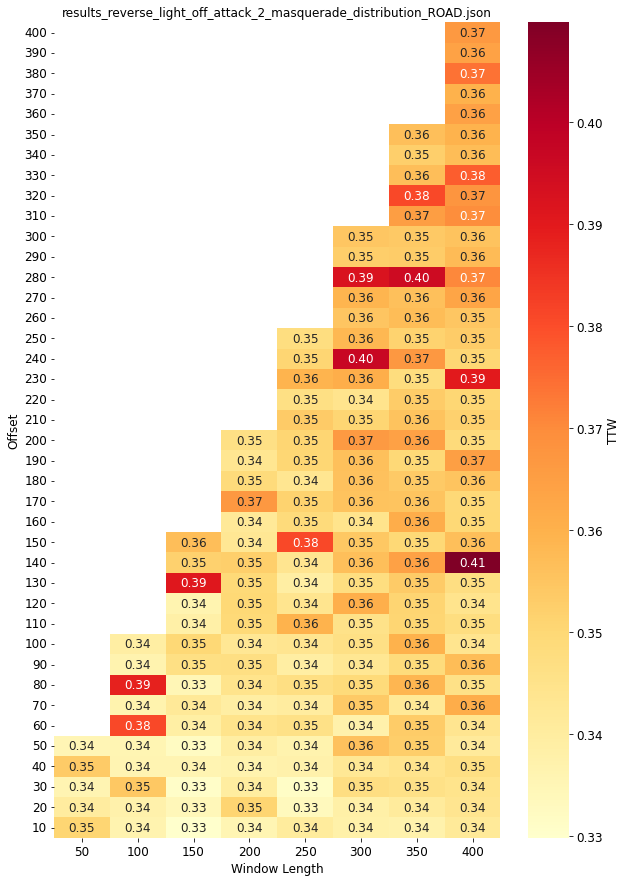

In [7]:
fig, ax = plt.subplots(figsize=(10, 15))

g = sns.heatmap(df_ttw, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
        annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

ax.set_ylabel("Offset", fontsize=12)
ax.set_xlabel("Window Length", fontsize=12)
ax.set_title(file, fontsize=12)

# colobar
cax = g.figure.axes[-1]
cax.yaxis.label.set_size(12)
cax.tick_params(labelsize=12)

# x-axis
g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

# y-axis
if g.get_yticklabels():
        g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## All Attack Files by Distribution Method

In [8]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_distribution_ROAD.json"):
            files.append(file)
            # print(file)

files = sorted(files)
print(files)
#files = [files[8], files[7], files[1], files[5], files[4], files[12], files[3], files[2], files[11]]
#print(files)

['results_correlated_signal_attack_1_masquerade_distribution_ROAD.json', 'results_correlated_signal_attack_2_masquerade_distribution_ROAD.json', 'results_correlated_signal_attack_3_masquerade_distribution_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_distribution_ROAD.json', 'results_max_speedometer_attack_1_masquerade_distribution_ROAD.json', 'results_max_speedometer_attack_2_masquerade_distribution_ROAD.json', 'results_max_speedometer_attack_3_masquerade_distribution_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_distribution_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_distribution_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_distribution_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_distribution_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_distribution_ROAD.json', 'results_reverse_light_on_attack_3_masquerade_distribution_ROAD.json']


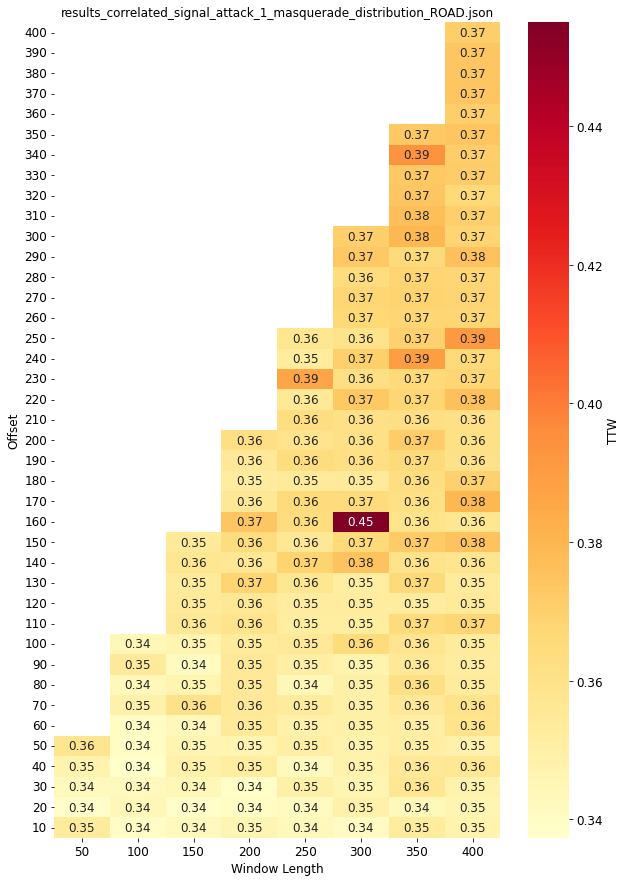

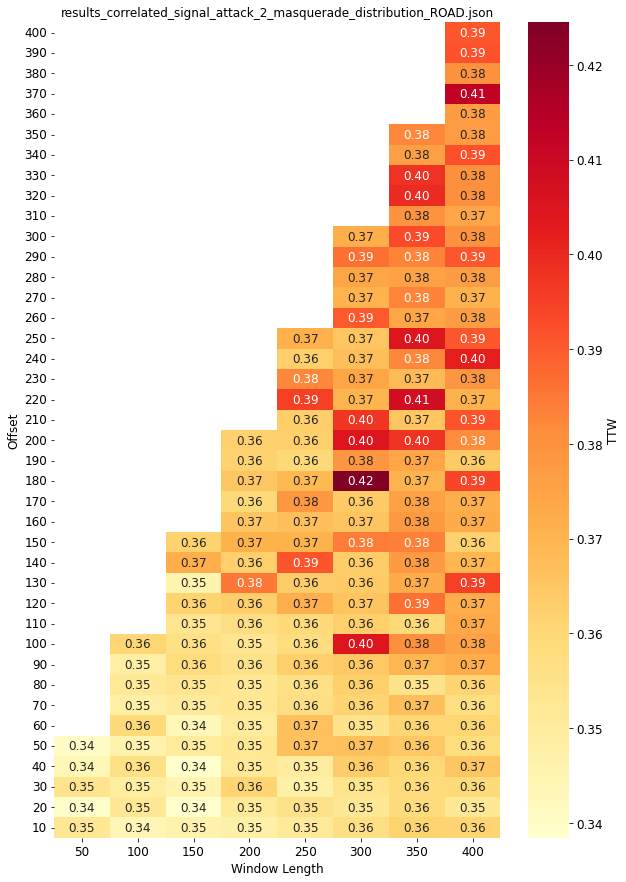

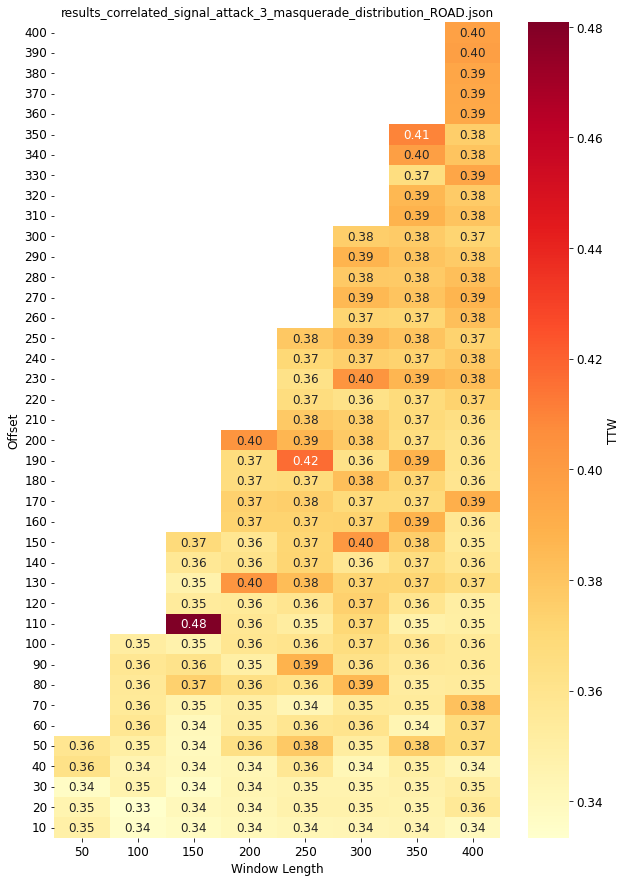

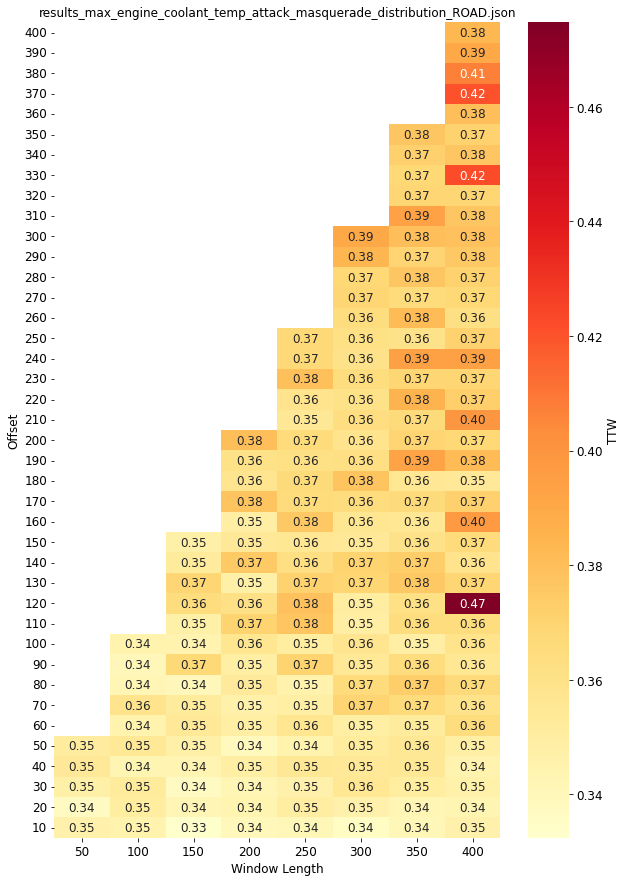

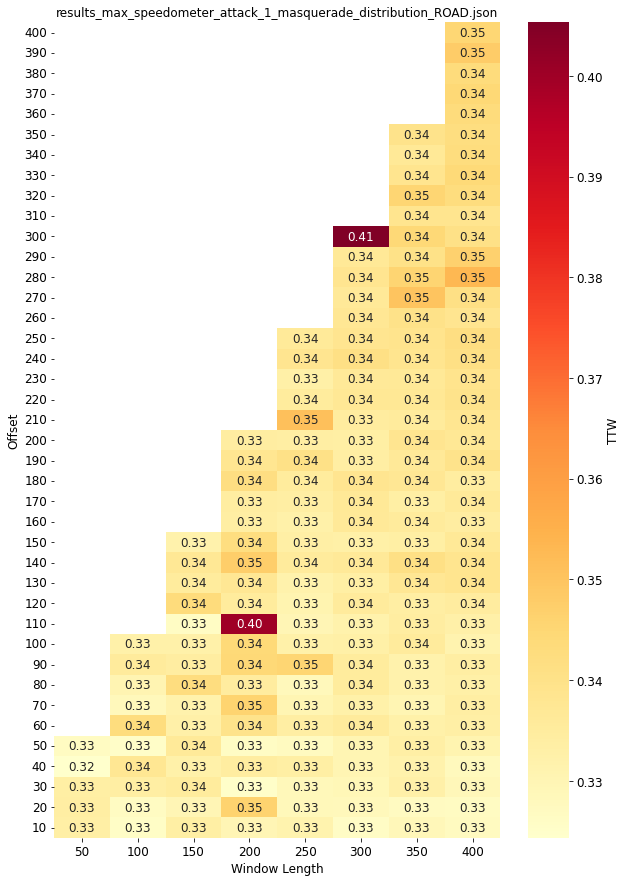

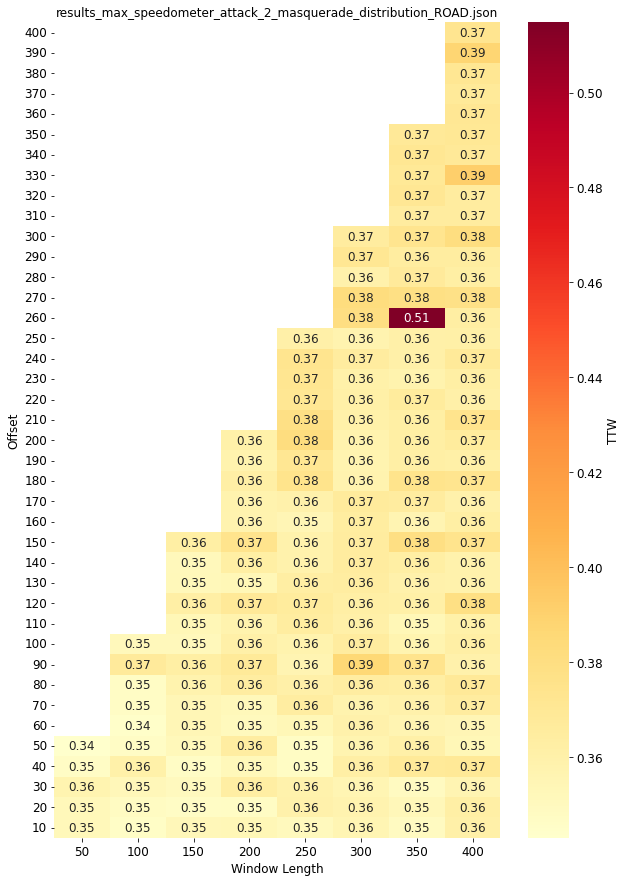

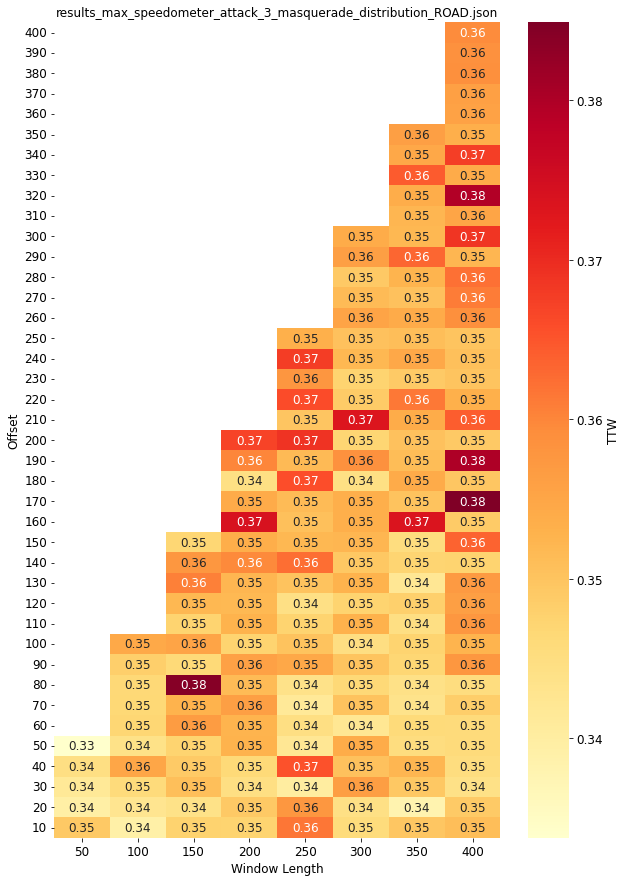

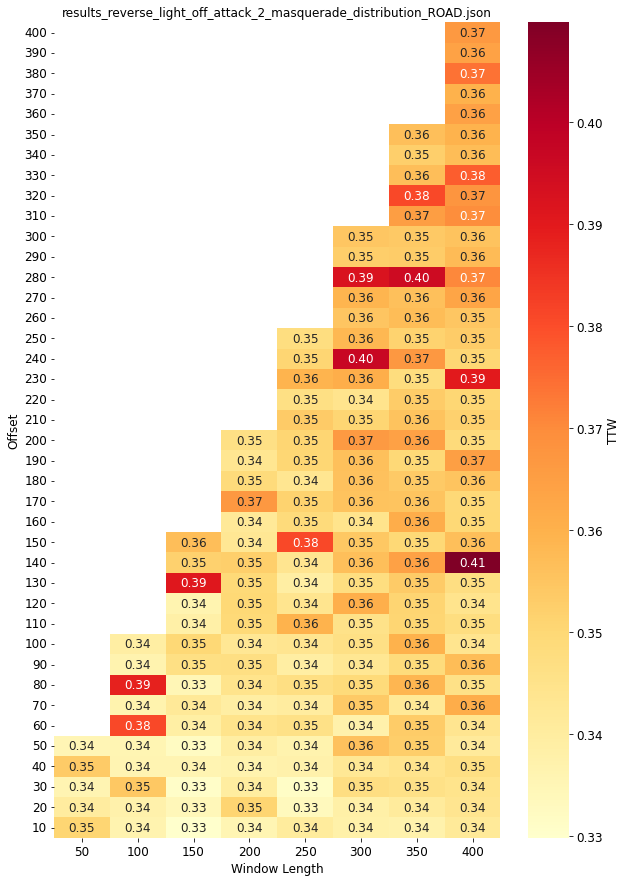

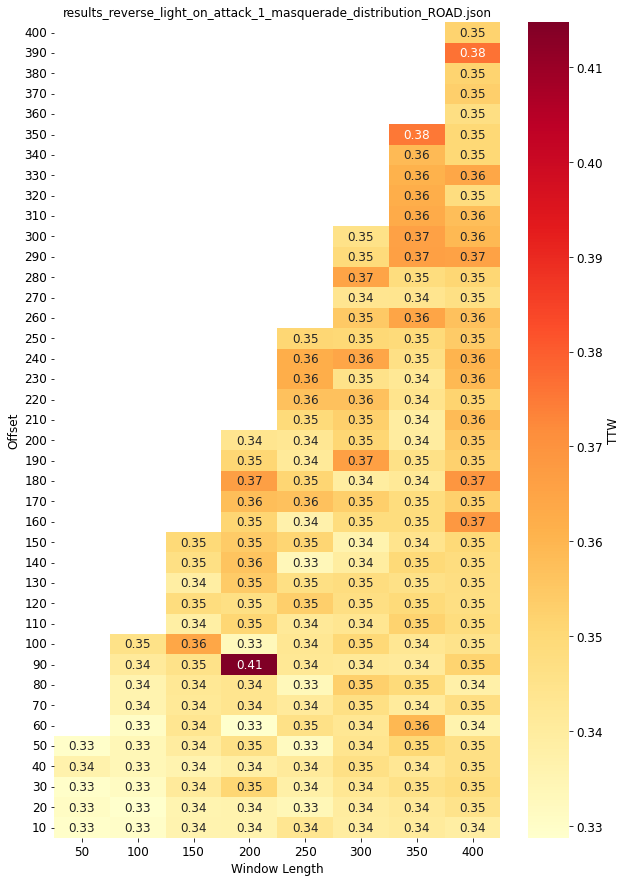

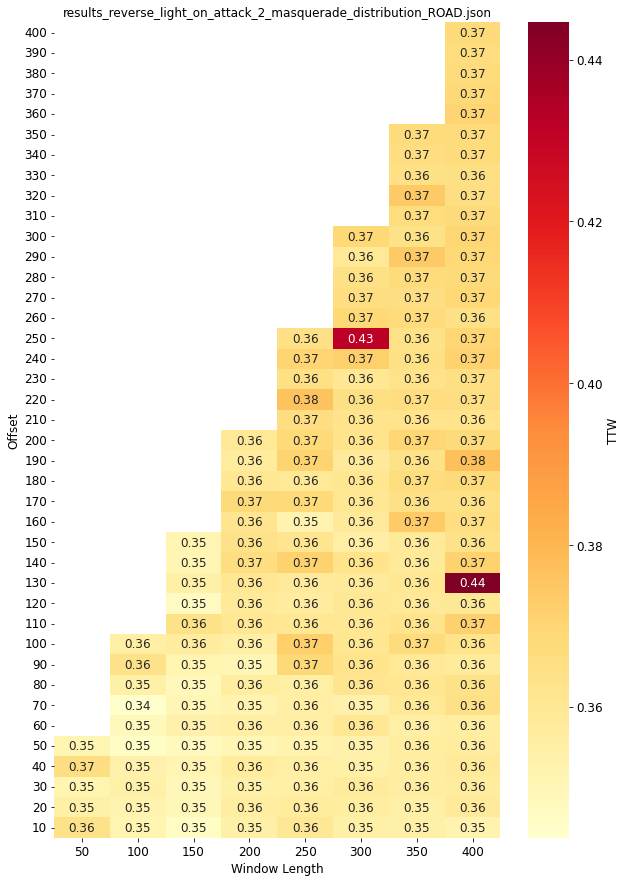

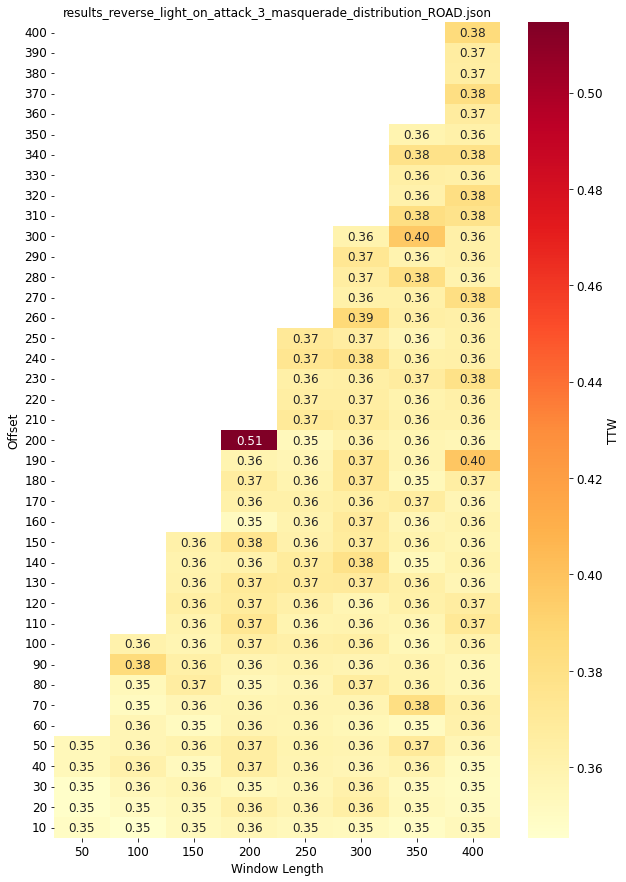

In [9]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    # print(index)

    with open(f"/home/cloud/ceph-robust/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2ttw = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ttw = grid2performance[key]["ttw"]

        columns = key.split("-")

        # print(columns)
        key2ttw[columns[0]].append(ttw)
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

        # break

    key2ttw = dict(key2ttw)
    # print(key2ttw)
    # print(len(index), index)

    df_ttw = pd.DataFrame({k:pd.Series(v) for k, v in key2ttw.items()})
    df_ttw.index = index

    # Covert to miliseconds
    df_ttw = 1000*df_ttw

    df_ttw = df_ttw[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_ttw, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## All Attack Files by Correlation Method

In [11]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_correlation_ROAD.json"):
            files.append(file)

print(files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

['results_reverse_light_on_attack_3_masquerade_correlation_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_3_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_1_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_1_masquerade_correlation_ROAD.json', 'results_correlated_signal_attack_3_masquerade_correlation_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_correlation_ROAD.json', 'results_max_speedometer_attack_2_masquerade_correlation_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_correlation_ROAD.json']


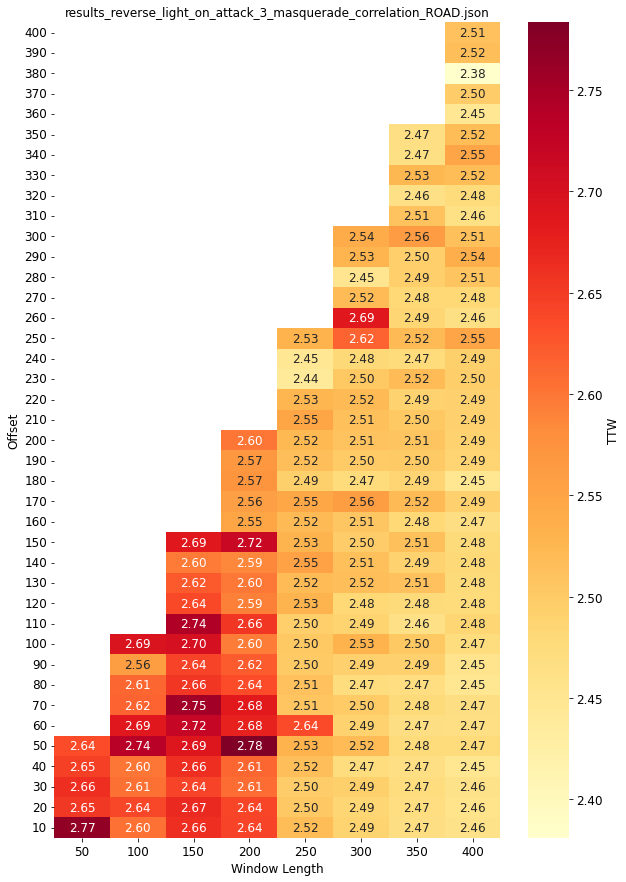

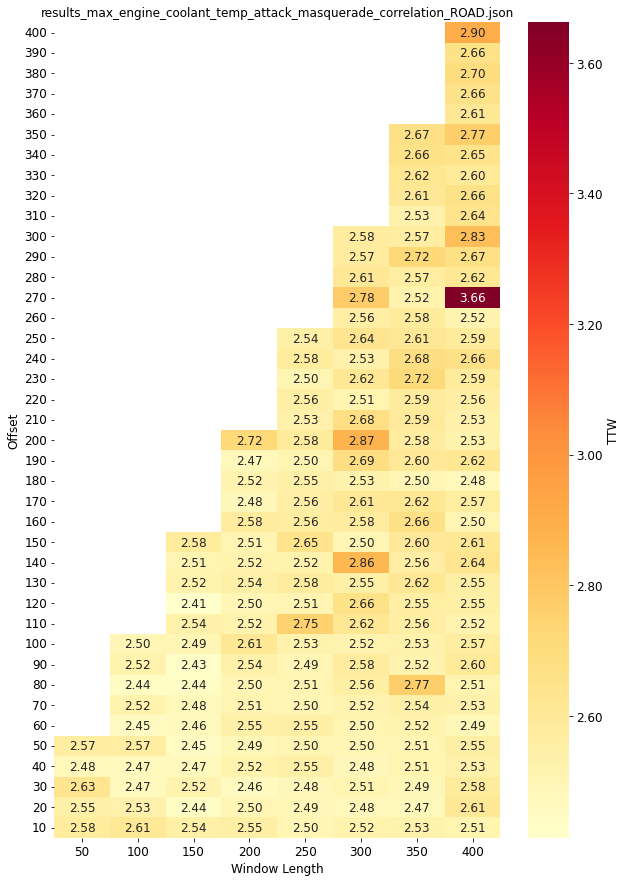

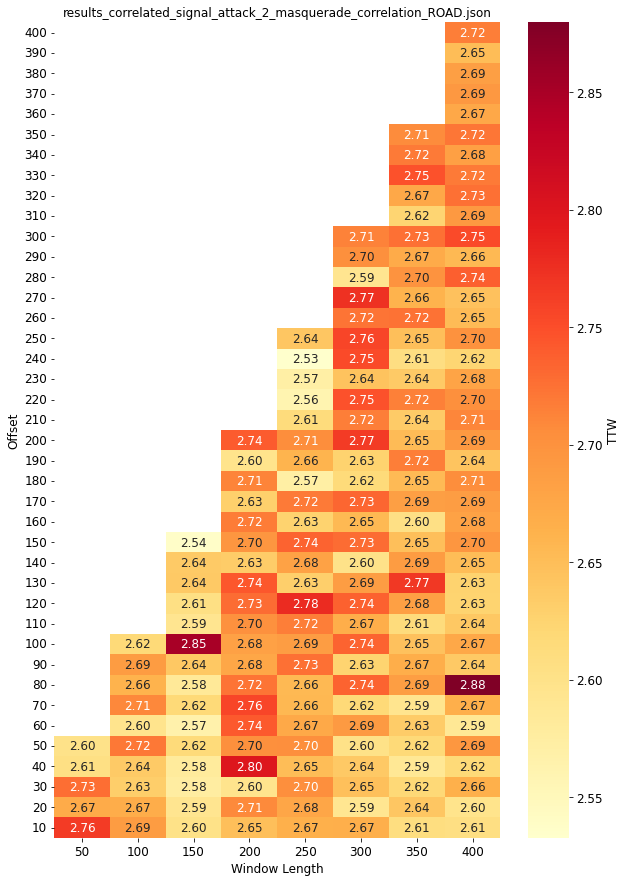

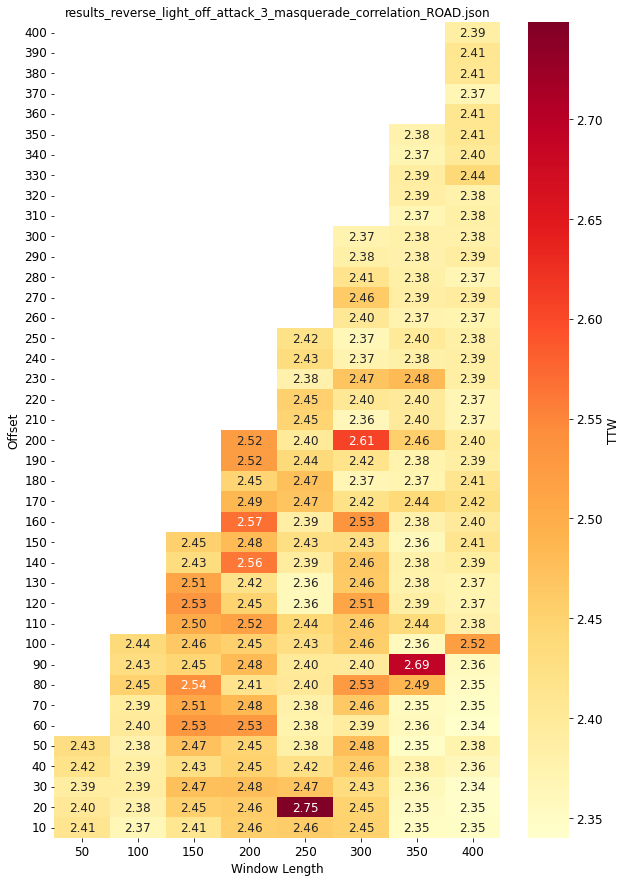

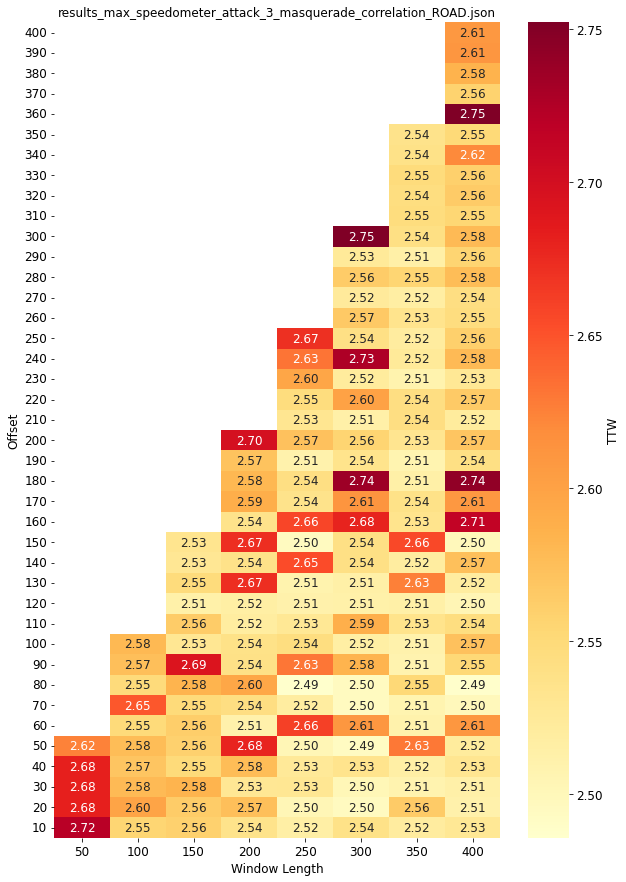

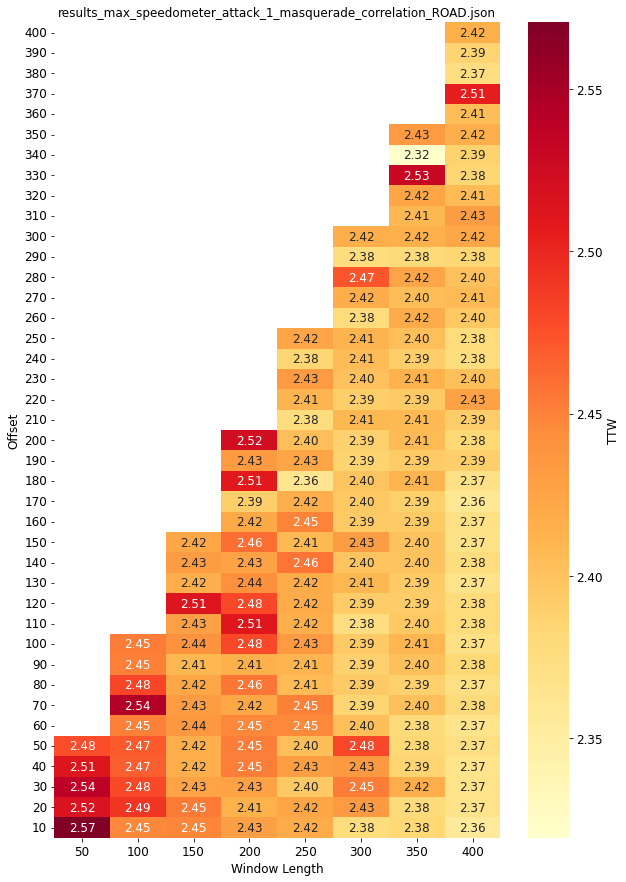

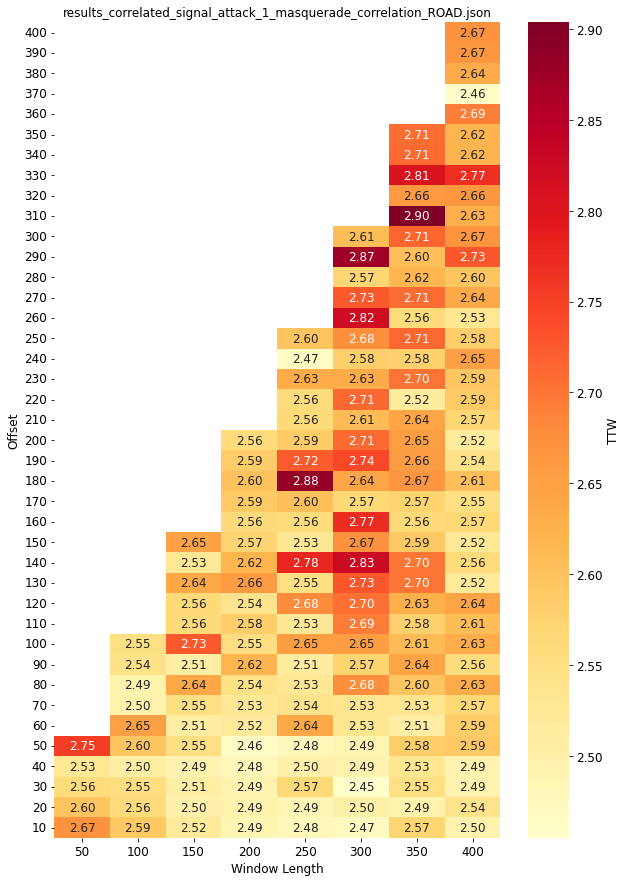

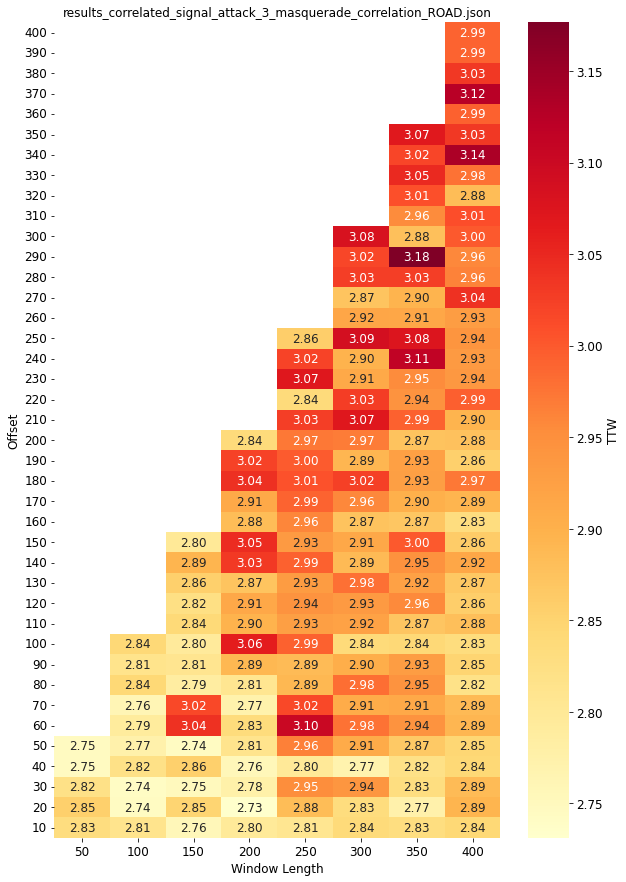

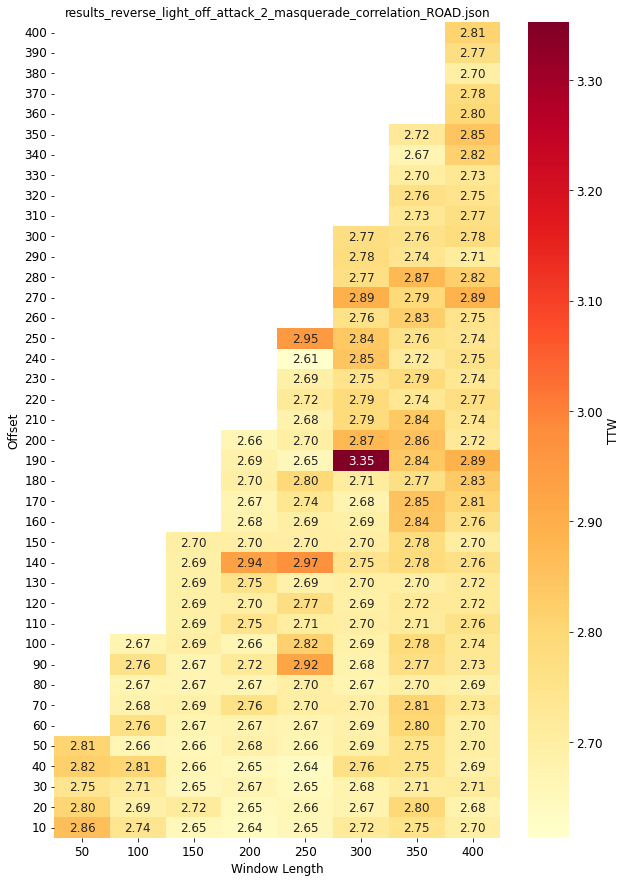

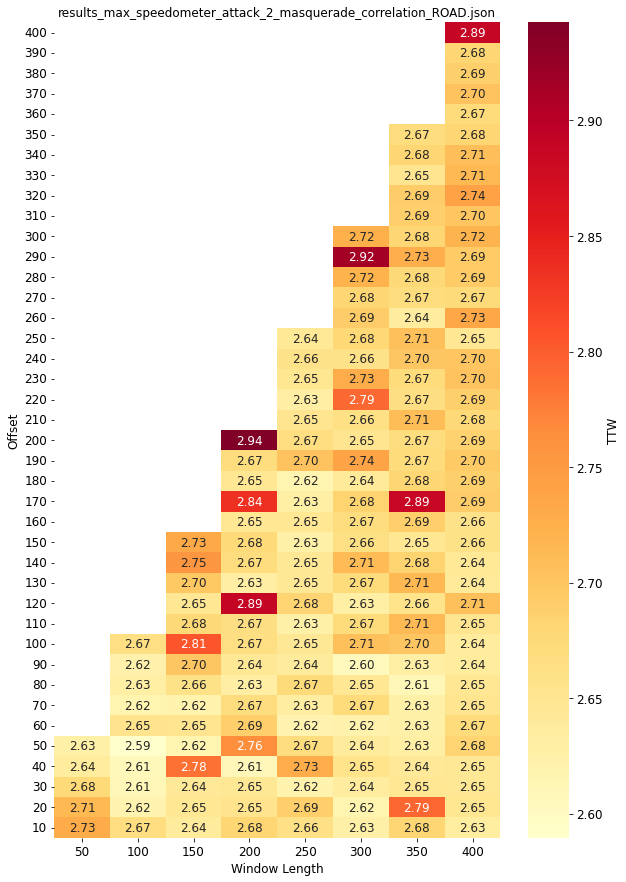

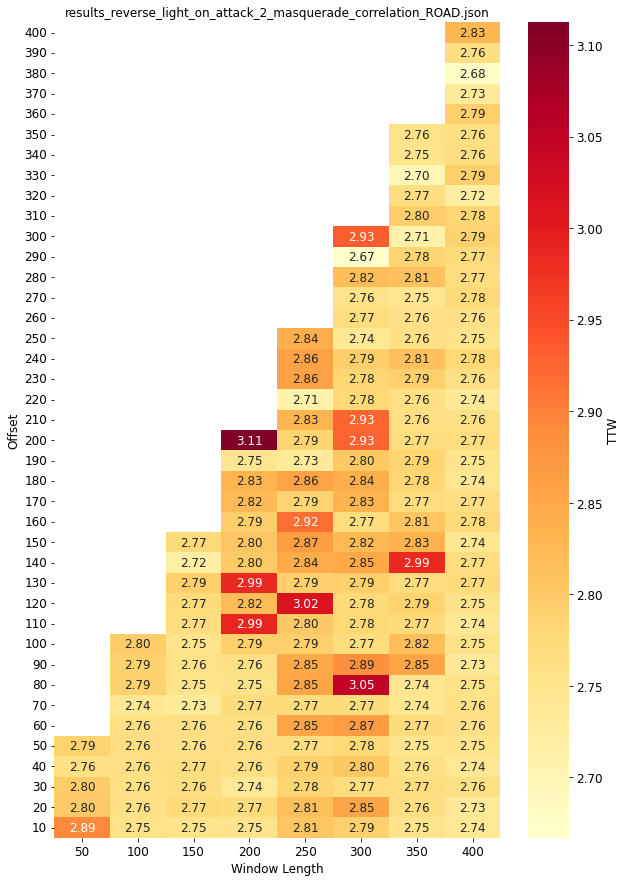

In [12]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    # print(index)

    with open(f"/home/cloud/ceph-robust/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2ttw = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ttw = grid2performance[key]["ttw"]

        columns = key.split("-")

        # print(columns)
        key2ttw[columns[0]].append(ttw)
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

        # break

    key2ttw = dict(key2ttw)
    # print(key2ttw)
    # print(len(index), index)

    df_ttw = pd.DataFrame({k:pd.Series(v) for k, v in key2ttw.items()})
    df_ttw.index = index

    # Covert to miliseconds
    df_ttw = 1000*df_ttw

    df_ttw = df_ttw[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_ttw, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## All Attack Files by DBSCAN Method

In [13]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_DBSCAN_ROAD.json"):
            files.append(file)

print(len(files), files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

13 ['results_correlated_signal_attack_2_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_DBSCAN_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_DBSCAN_ROAD.json', 'results_max_speedometer_attack_1_masquerade_DBSCAN_ROAD.json', 'results_correlated_signal_attack_1_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_on_attack_3_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_off_attack_1_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_DBSCAN_ROAD.json', 'results_correlated_signal_attack_3_masquerade_DBSCAN_ROAD.json', 'results_max_speedometer_attack_2_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_DBSCAN_ROAD.json', 'results_max_speedometer_attack_3_masquerade_DBSCAN_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_DBSCAN_ROAD.json']


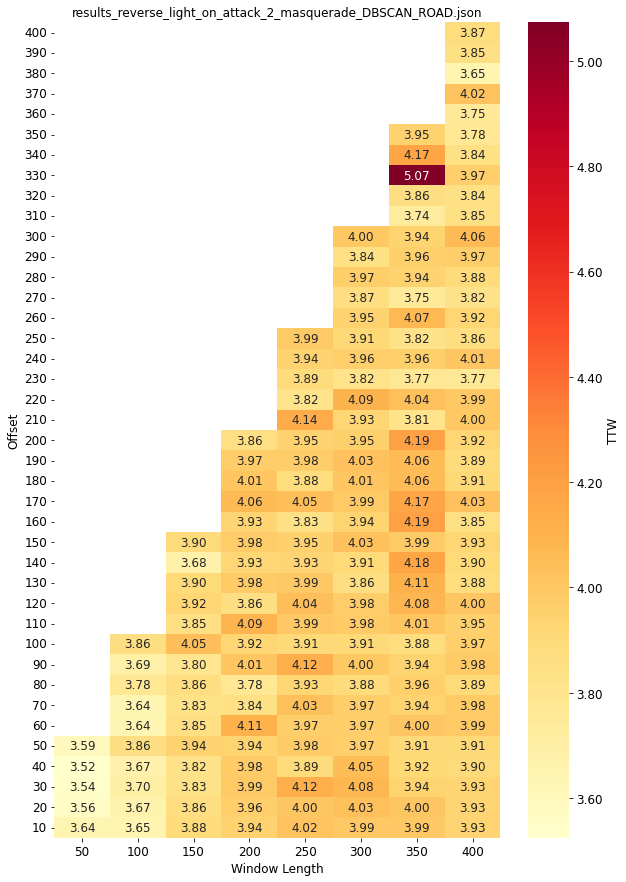

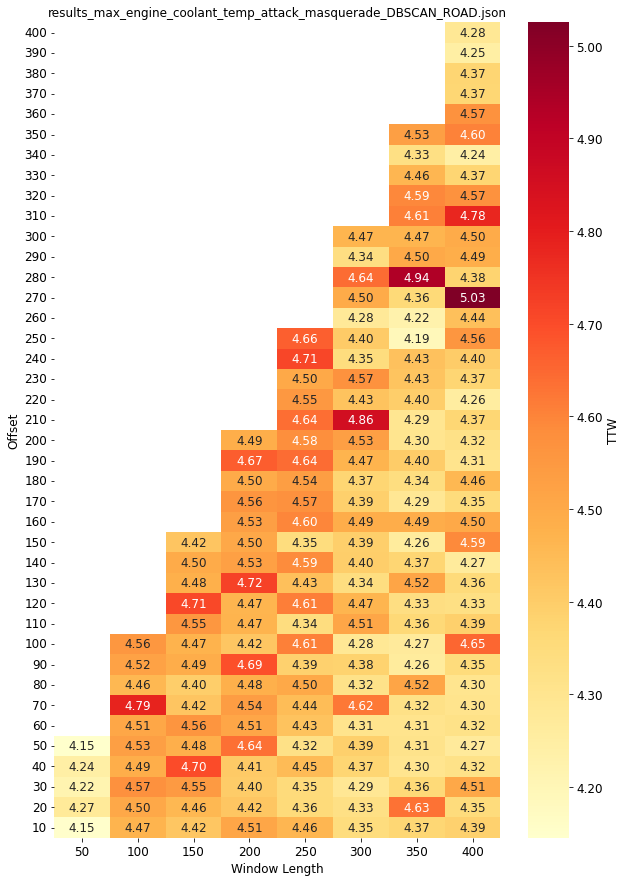

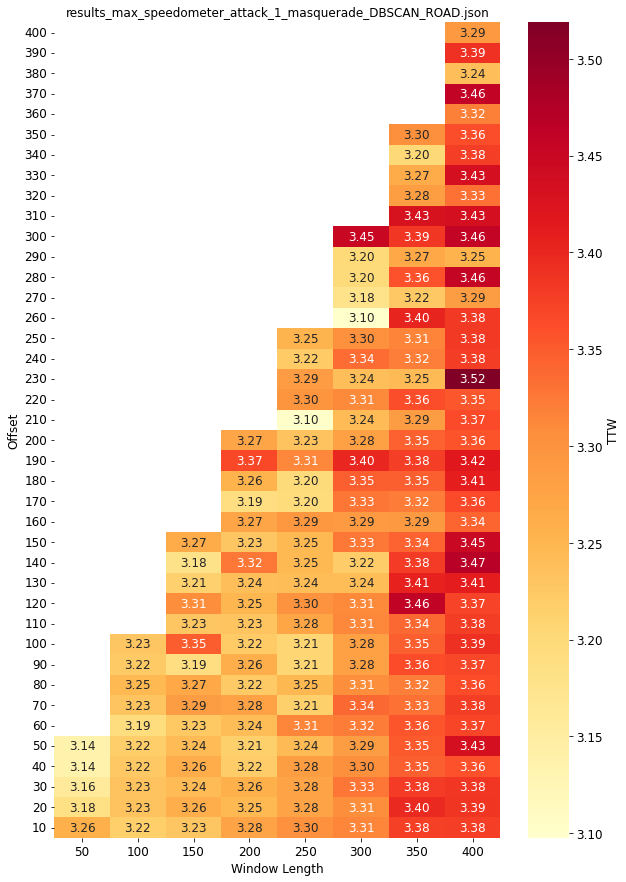

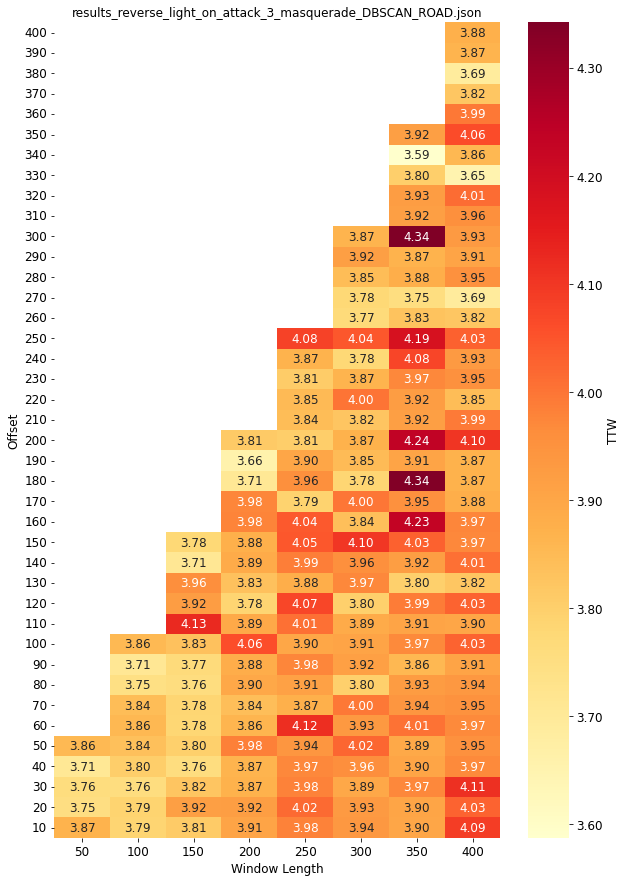

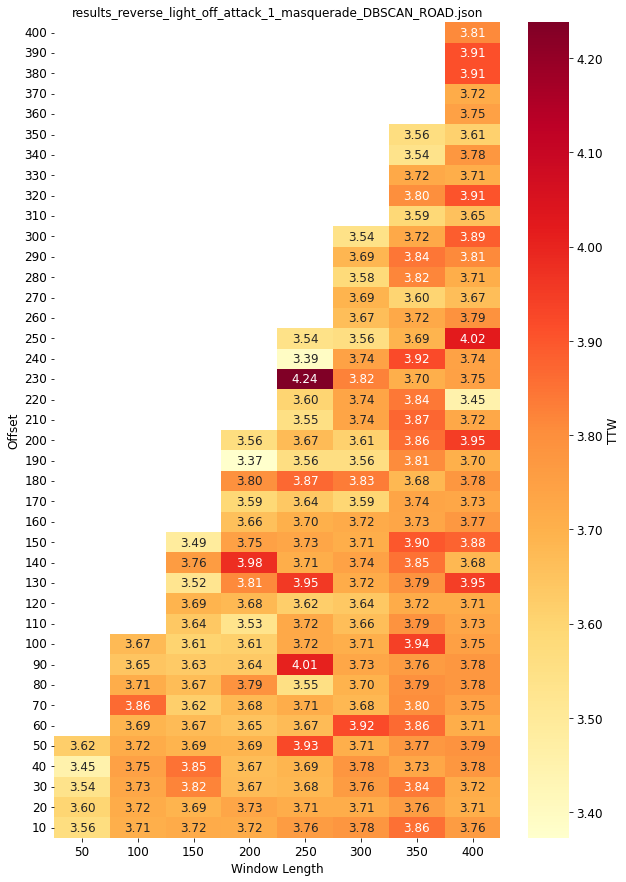

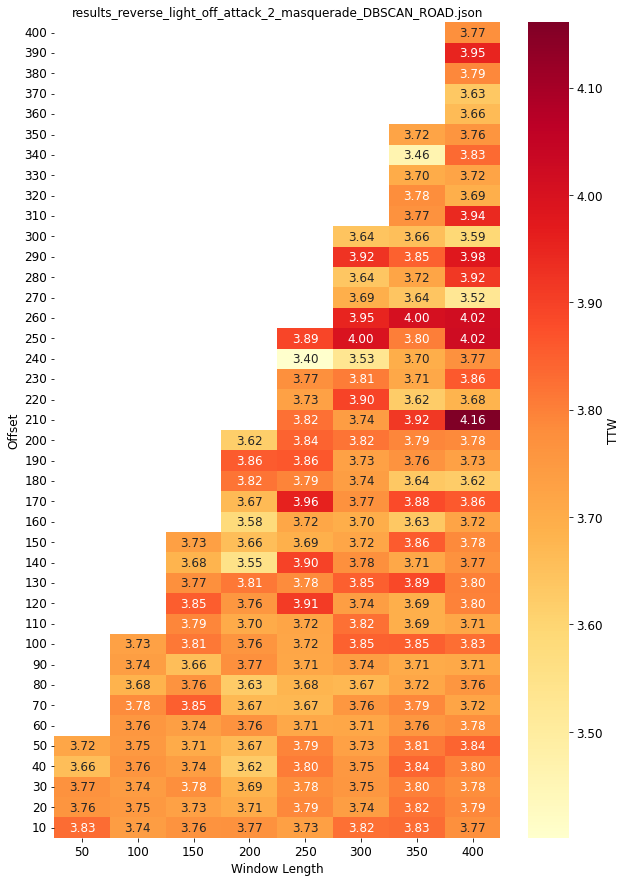

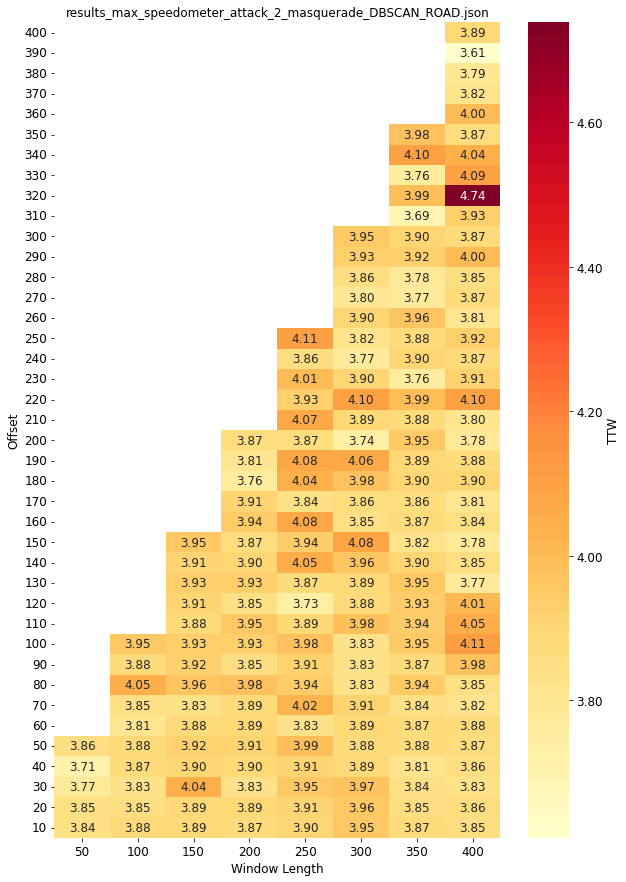

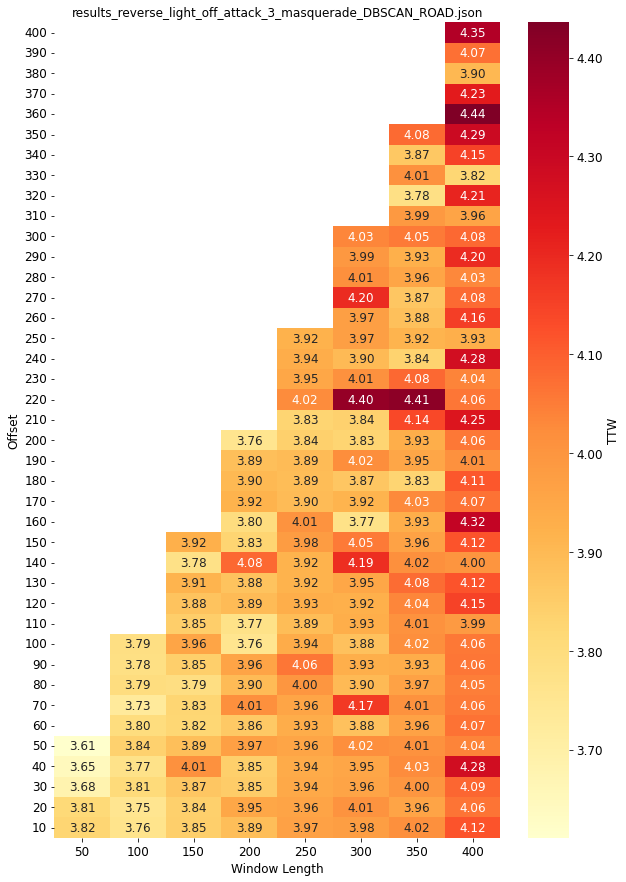

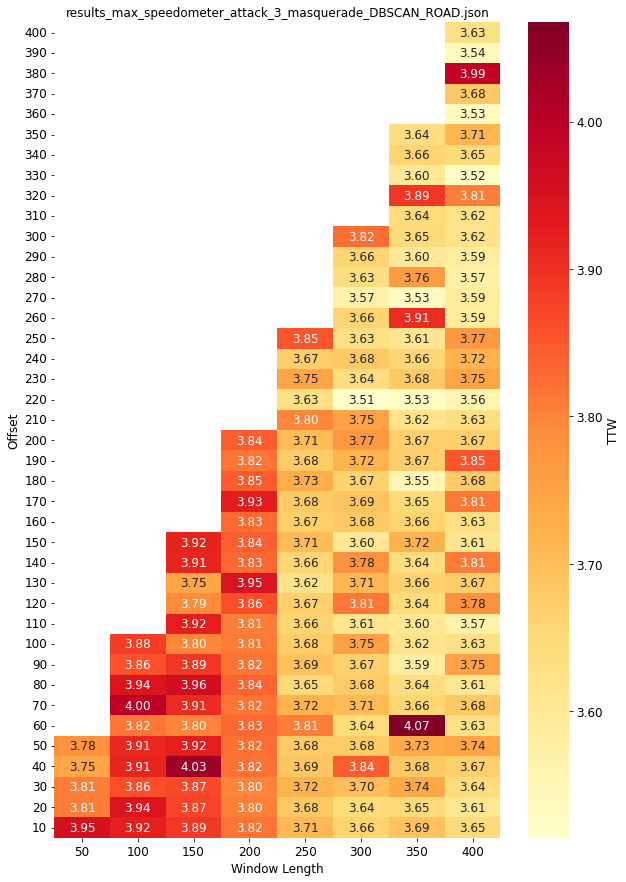

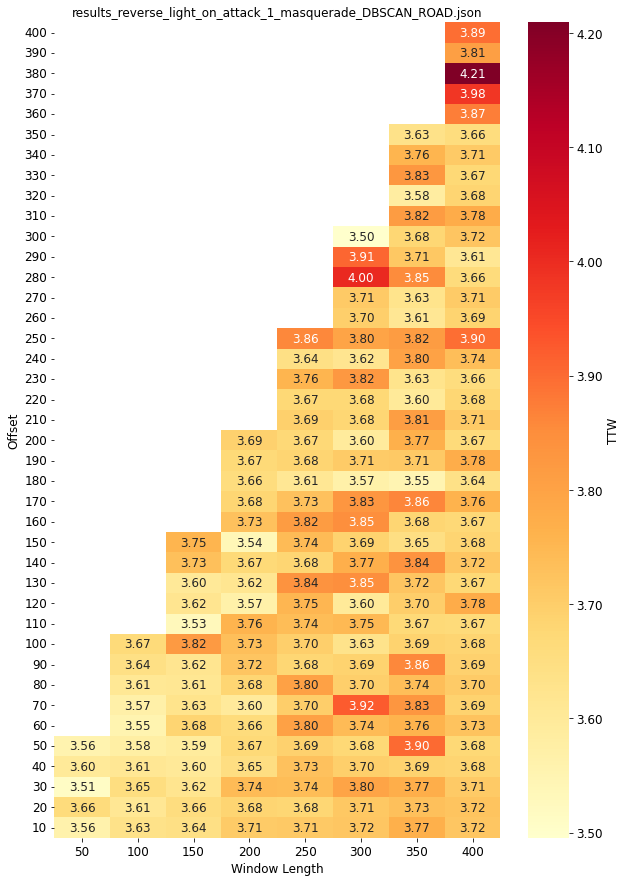

In [14]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    # print(index)

    with open(f"/home/cloud/ceph-robust/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2ttw = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ttw = grid2performance[key]["ttw"]

        columns = key.split("-")

        # print(columns)
        key2ttw[columns[0]].append(ttw)
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

        # break

    key2ttw = dict(key2ttw)
    # print(key2ttw)
    # print(len(index), index)

    df_ttw = pd.DataFrame({k:pd.Series(v) for k, v in key2ttw.items()})
    df_ttw.index = index

    # Covert to miliseconds
    df_ttw = 1000*df_ttw

    df_ttw = df_ttw[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_ttw, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)

## All Attack Files by AHC Method

In [16]:
files = []

for file in os.listdir("../data/"):
    if file.startswith("results_"):
        if file.endswith("_AHC_ROAD.json"):
            files.append(file)

print(len(files), files)
# files = [files[0], files[1], files[2], files[3]]
# print(files)

13 ['results_reverse_light_off_attack_1_masquerade_AHC_ROAD.json', 'results_correlated_signal_attack_2_masquerade_AHC_ROAD.json', 'results_reverse_light_off_attack_3_masquerade_AHC_ROAD.json', 'results_max_engine_coolant_temp_attack_masquerade_AHC_ROAD.json', 'results_max_speedometer_attack_1_masquerade_AHC_ROAD.json', 'results_max_speedometer_attack_3_masquerade_AHC_ROAD.json', 'results_reverse_light_on_attack_2_masquerade_AHC_ROAD.json', 'results_correlated_signal_attack_3_masquerade_AHC_ROAD.json', 'results_reverse_light_on_attack_3_masquerade_AHC_ROAD.json', 'results_reverse_light_on_attack_1_masquerade_AHC_ROAD.json', 'results_correlated_signal_attack_1_masquerade_AHC_ROAD.json', 'results_reverse_light_off_attack_2_masquerade_AHC_ROAD.json', 'results_max_speedometer_attack_2_masquerade_AHC_ROAD.json']


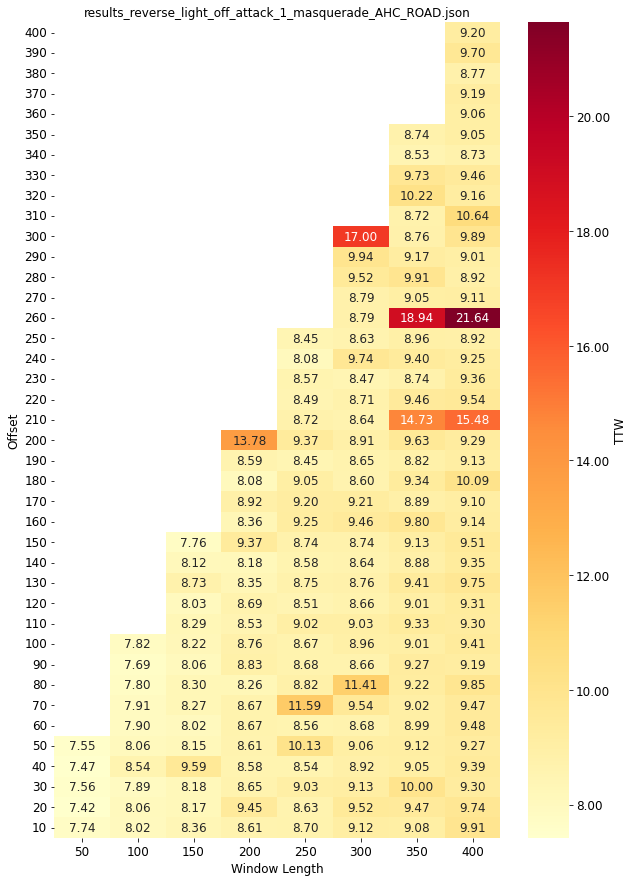

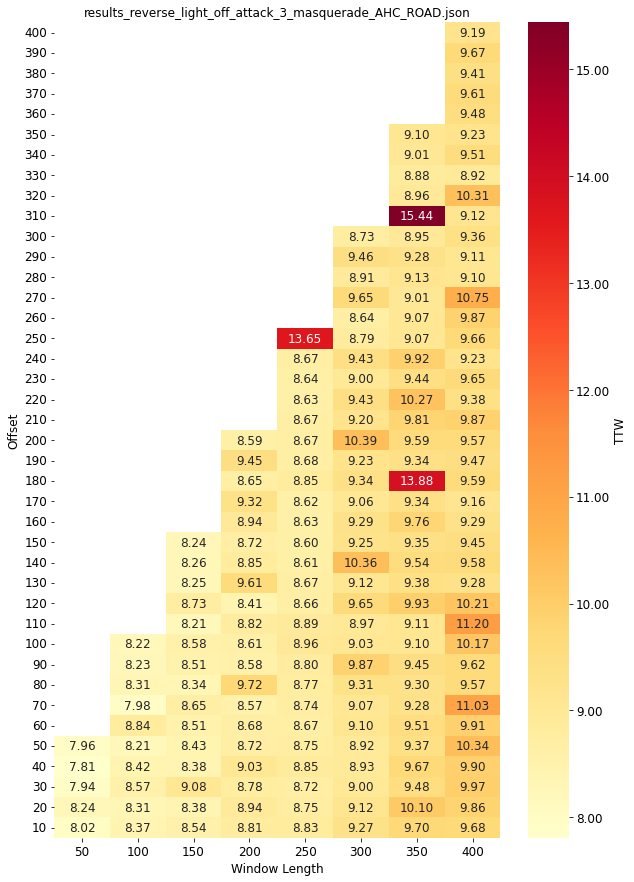

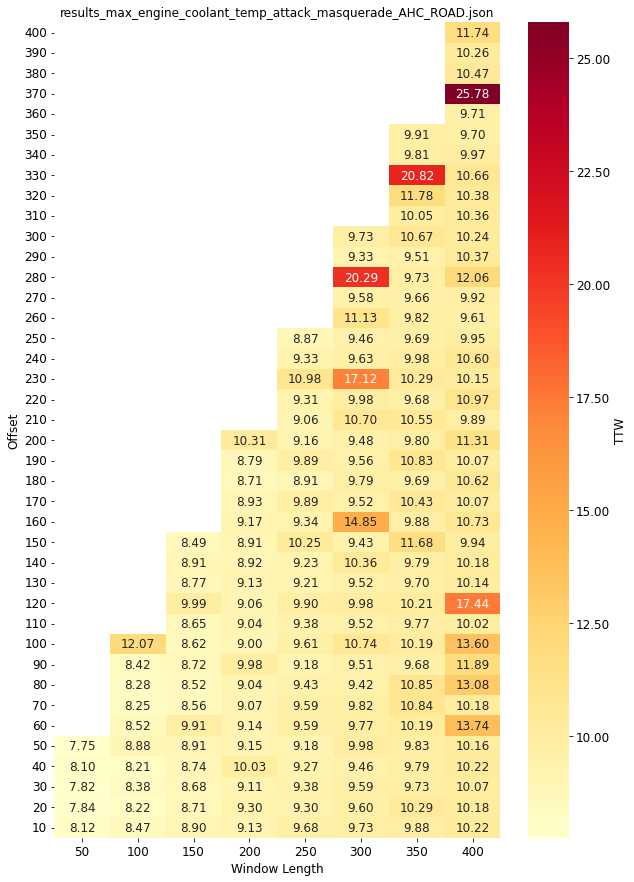

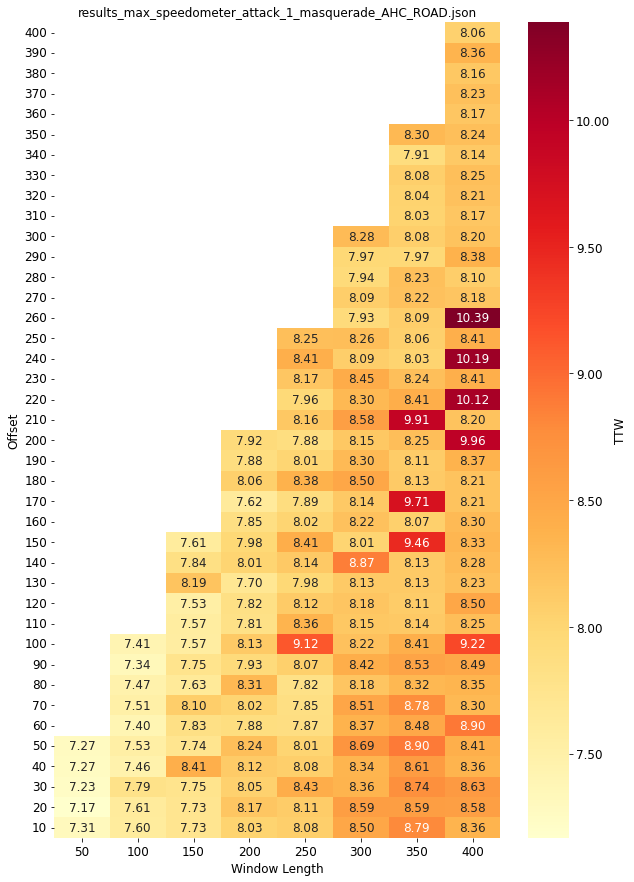

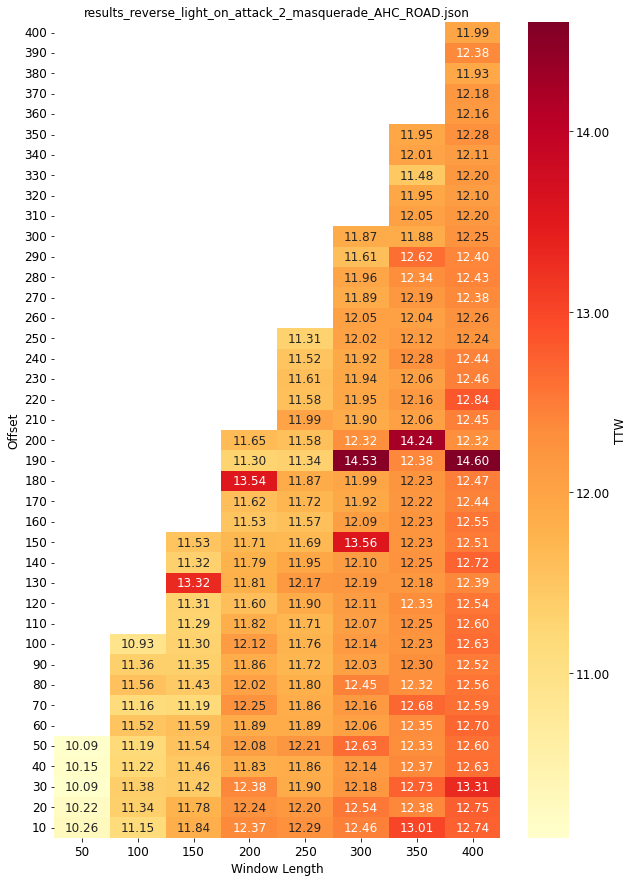

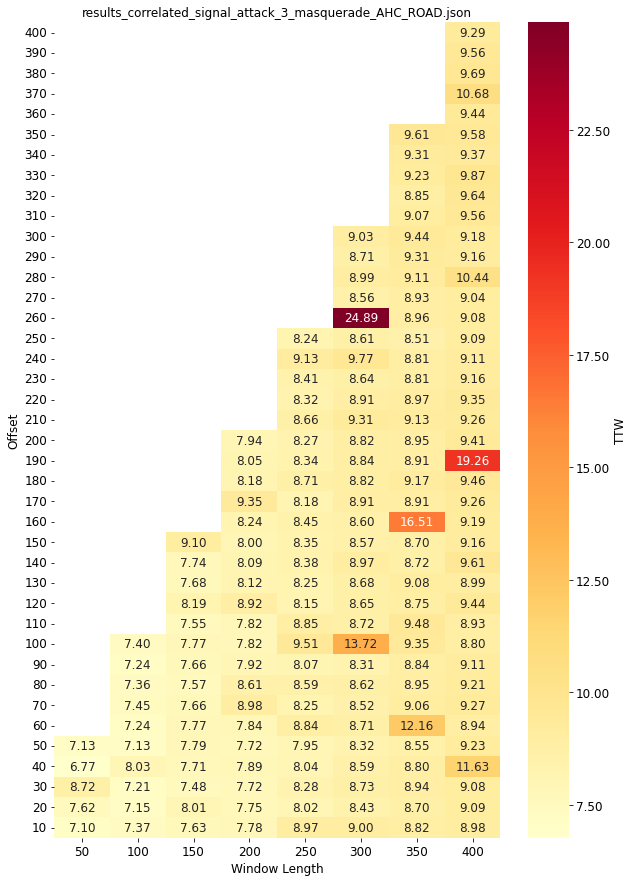

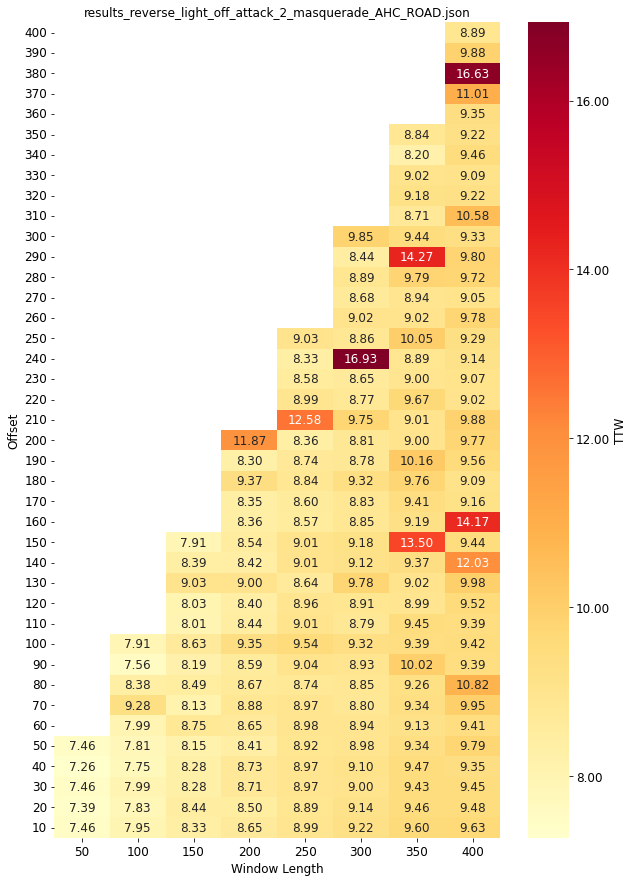

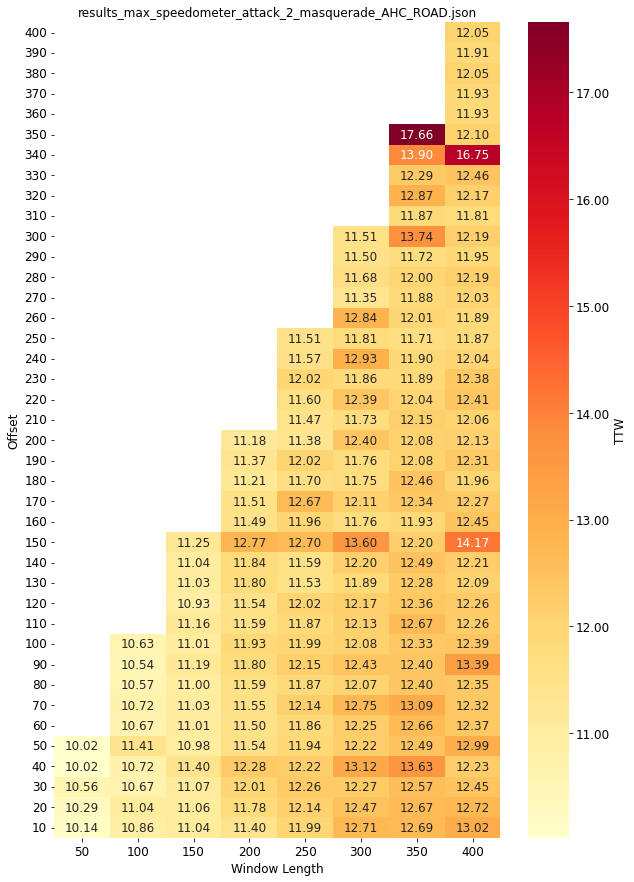

In [17]:
# metrics = ["DR", "FAR", "AUC-ROC", "AUC-PR"]
# coordinates = [[0, 0], [0, 1], [1, 0], [1, 1]]

# fig, axes = plt.subplots(2, 2, figsize=(25, 14), sharex=True, sharey=True, gridspec_kw = {"wspace":-0.02, "hspace":0.1})
# fig.suptitle("Logistic Regression", size=12)

for index, file in enumerate(files):

    # print(index)

    with open(f"/home/cloud/ceph-robust/CAN/signal-ids-benchmark/data/{file}", "r") as outfile:
        grid2performance = json.load(outfile)


    key2ttw = defaultdict(list)
    index = []

    for key in grid2performance.keys():

        ttw = grid2performance[key]["ttw"]

        columns = key.split("-")

        # print(columns)
        key2ttw[columns[0]].append(ttw)
        # sample.append(dict(entry))

        if columns[1] not in index: 
            index.append(columns[1])

        # break

    key2ttw = dict(key2ttw)
    # print(key2ttw)
    # print(len(index), index)

    df_ttw = pd.DataFrame({k:pd.Series(v) for k, v in key2ttw.items()})
    df_ttw.index = index

    # Covert to miliseconds
    df_ttw = 1000*df_ttw

    df_ttw = df_ttw[::-1] # invert the order of dataframe rows

    fig, ax = plt.subplots(figsize=(10, 15))

    g = sns.heatmap(df_ttw, annot=True, cbar=True, cbar_kws={"label": "TTW", "location":"right", "pad":0.05, "format":"%.2f"}, 
            annot_kws={"size": 12}, fmt=".2f", ax=ax, cmap="YlOrRd")

    ax.set_ylabel("Offset", fontsize=12)
    ax.set_xlabel("Window Length", fontsize=12)
    ax.set_title(file, fontsize=12)

    # colobar
    cax = g.figure.axes[-1]
    cax.yaxis.label.set_size(12)
    cax.tick_params(labelsize=12)

    # x-axis
    g.set_xticklabels(g.get_xticklabels(), rotation=0, fontsize=12)

    # y-axis
    if g.get_yticklabels():
            g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)